In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing
import os

#For Preprocessing
import re    # RegEx for removing non-letter characters
from bs4 import BeautifulSoup
import nltk  #natural language processing
nltk.download('wordnet')
nltk.download('punkt')
nltk.download("stopwords")
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# For Building the model
from sklearn.model_selection import train_test_split
import tensorflow as tf
import keras
import seaborn as sns

#For data visualization
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline

pd.options.plotting.backend = "plotly"

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [ ]:
df=pd.read_csv("all-data.csv",engine="python",encoding="ISO-8859-1")
df = pd.DataFrame(df)

# Set pandas display options to show full text
pd.set_option('display.max_colwidth', None)
df

,neutral,"According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing ."
0,neutral,"Technopolis plans to develop in stages an area of no less than 100,000 square meters in order to host companies working in computer technologies and telecommunications , the statement said ."
1,negative,"The international electronic industry company Elcoteq has laid off tens of employees from its Tallinn facility ; contrary to earlier layoffs the company contracted the ranks of its office workers , the daily Postimees reported ."
2,positive,With the new production plant the company would increase its capacity to meet the expected increase in demand and would improve the use of raw materials and therefore increase the production profitability .
3,positive,"According to the company 's updated strategy for the years 2009-2012 , Basware targets a long-term net sales growth in the range of 20 % -40 % with an operating profit margin of 10 % -20 % of net sales ."
4,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is aggressively pursuing its growth strategy by increasingly focusing on technologically more demanding HDI printed circuit boards PCBs .
...,...,...
4840,negative,LONDON MarketWatch -- Share prices ended lower in London Monday as a rebound in bank stocks failed to offset broader weakness for the FTSE 100 .
4841,neutral,"Rinkuskiai 's beer sales fell by 6.5 per cent to 4.16 million litres , while Kauno Alus ' beer sales jumped by 6.9 per cent to 2.48 million litres ."
4842,negative,"Operating profit fell to EUR 35.4 mn from EUR 68.8 mn in 2007 , including vessel sales gain of EUR 12.3 mn ."
4843,negative,"Net sales of the Paper segment decreased to EUR 221.6 mn in the second quarter of 2009 from EUR 241.1 mn in the second quarter of 2008 , while operating profit excluding non-recurring items rose to EUR 8.0 mn from EUR 7.6 mn ."


In [ ]:
df = df.rename(columns=lambda col: 'sentiment' if col == 'neutral' else 'text' if col.startswith('According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .') else col)
df


,sentiment,text
0,neutral,"Technopolis plans to develop in stages an area of no less than 100,000 square meters in order to host companies working in computer technologies and telecommunications , the statement said ."
1,negative,"The international electronic industry company Elcoteq has laid off tens of employees from its Tallinn facility ; contrary to earlier layoffs the company contracted the ranks of its office workers , the daily Postimees reported ."
2,positive,With the new production plant the company would increase its capacity to meet the expected increase in demand and would improve the use of raw materials and therefore increase the production profitability .
3,positive,"According to the company 's updated strategy for the years 2009-2012 , Basware targets a long-term net sales growth in the range of 20 % -40 % with an operating profit margin of 10 % -20 % of net sales ."
4,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is aggressively pursuing its growth strategy by increasingly focusing on technologically more demanding HDI printed circuit boards PCBs .
...,...,...
4840,negative,LONDON MarketWatch -- Share prices ended lower in London Monday as a rebound in bank stocks failed to offset broader weakness for the FTSE 100 .
4841,neutral,"Rinkuskiai 's beer sales fell by 6.5 per cent to 4.16 million litres , while Kauno Alus ' beer sales jumped by 6.9 per cent to 2.48 million litres ."
4842,negative,"Operating profit fell to EUR 35.4 mn from EUR 68.8 mn in 2007 , including vessel sales gain of EUR 12.3 mn ."
4843,negative,"Net sales of the Paper segment decreased to EUR 221.6 mn in the second quarter of 2009 from EUR 241.1 mn in the second quarter of 2008 , while operating profit excluding non-recurring items rose to EUR 8.0 mn from EUR 7.6 mn ."


<ipython-input-52-2d409bb73bae>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning

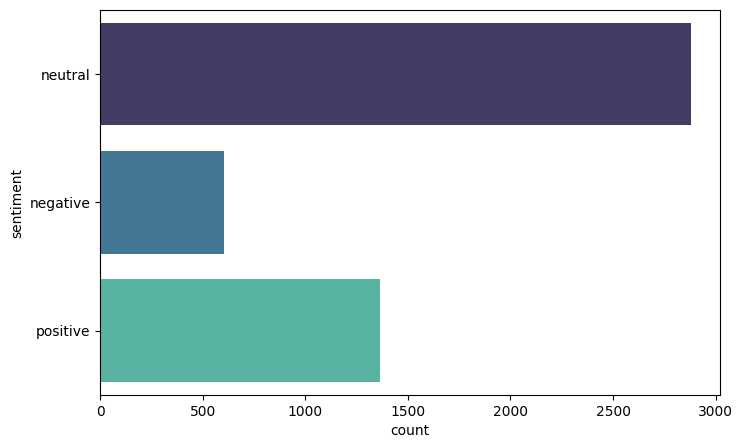

In [ ]:
plt.figure(figsize=(8, 5))
ax = sns.countplot(y="sentiment", data=df, palette="mako")

In [ ]:
print(df.iloc[0:5, :])

  sentiment  \
0   neutral   
1  negative   
2  positive   
3  positive   
4  positive   

                                                                                                                                                                                                                                   text  
0                                        Technopolis plans to develop in stages an area of no less than 100,000 square meters in order to host companies working in computer technologies and telecommunications , the statement said .  
1  The international electronic industry company Elcoteq has laid off tens of employees from its Tallinn facility ; contrary to earlier layoffs the company contracted the ranks of its office workers , the daily Postimees reported .  
2                        With the new production plant the company would increase its capacity to meet the expected increase in demand and would improve the use of raw materials and therefore increase the pr

In [ ]:
# Define a function that integrates lowercasing, special character removal, and placeholder handling
def clean_and_preprocess_text(text):
    # Clean HTML tags
    text = BeautifulSoup(text, "lxml").text

    # Replace URLs with <URL>
    text = re.sub(r'http\S+', r'<URL>', text)

    # Convert to lowercase
    text = text.lower()

    # Replace percentages (e.g., "65 per cent") with just the number and "percentage"
    text = re.sub(r'(\d+)\s*percent|\s*per cent|\s*%', r'\1 percentage', text)
    text = re.sub(r'(\d+)\s*percentageage', r'\1 percentage', text, flags=re.IGNORECASE)

    # Handle placeholders by removing angle brackets
    text = re.sub(r'<([^>]+)>', r'\1', text)  # Convert <PERCENTAGE> to PERCENTAGE

    # Remove special characters except for letters, numbers, and spaces
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)

    # Normalize spaces: replace multiple spaces with a single space
    text = re.sub(r'\s+', ' ', text).strip()

    return text

# Apply the function to the 'Message' column
df['cleaned_text'] = df['text'].apply(clean_and_preprocess_text)



<ipython-input-54-d651f846587b>:4: MarkupResemblesLocatorWarning:

The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.



In [ ]:
df

,sentiment,text,cleaned_text
0,neutral,"Technopolis plans to develop in stages an area of no less than 100,000 square meters in order to host companies working in computer technologies and telecommunications , the statement said .",technopolis plans to develop in stages an area of no less than 100000 square meters in order to host companies working in computer technologies and telecommunications the statement said
1,negative,"The international electronic industry company Elcoteq has laid off tens of employees from its Tallinn facility ; contrary to earlier layoffs the company contracted the ranks of its office workers , the daily Postimees reported .",the international electronic industry company elcoteq has laid off tens of employees from its tallinn facility contrary to earlier layoffs the company contracted the ranks of its office workers the daily postimees reported
2,positive,With the new production plant the company would increase its capacity to meet the expected increase in demand and would improve the use of raw materials and therefore increase the production profitability .,with the new production plant the company would increase its capacity to meet the expected increase in demand and would improve the use of raw materials and therefore increase the production profitability
3,positive,"According to the company 's updated strategy for the years 2009-2012 , Basware targets a long-term net sales growth in the range of 20 % -40 % with an operating profit margin of 10 % -20 % of net sales .",according to the company s updated strategy for the years 20092012 basware targets a longterm net sales growth in the range of 20 percentage 40 percentage with an operating profit margin of 10 percentage 20 percentage of net sales
4,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is aggressively pursuing its growth strategy by increasingly focusing on technologically more demanding HDI printed circuit boards PCBs .,financing of aspocomp s growth aspocomp is aggressively pursuing its growth strategy by increasingly focusing on technologically more demanding hdi printed circuit boards pcbs
...,...,...,...
4840,negative,LONDON MarketWatch -- Share prices ended lower in London Monday as a rebound in bank stocks failed to offset broader weakness for the FTSE 100 .,london marketwatch share prices ended lower in london monday as a rebound in bank stocks failed to offset broader weakness for the ftse 100
4841,neutral,"Rinkuskiai 's beer sales fell by 6.5 per cent to 4.16 million litres , while Kauno Alus ' beer sales jumped by 6.9 per cent to 2.48 million litres .",rinkuskiai s beer sales fell by 65 percentage to 416 million litres while kauno alus beer sales jumped by 69 percentage to 248 million litres
4842,negative,"Operating profit fell to EUR 35.4 mn from EUR 68.8 mn in 2007 , including vessel sales gain of EUR 12.3 mn .",operating profit fell to eur 354 mn from eur 688 mn in 2007 including vessel sales gain of eur 123 mn
4843,negative,"Net sales of the Paper segment decreased to EUR 221.6 mn in the second quarter of 2009 from EUR 241.1 mn in the second quarter of 2008 , while operating profit excluding non-recurring items rose to EUR 8.0 mn from EUR 7.6 mn .",net sales of the paper segment decreased to eur 2216 mn in the second quarter of 2009 from eur 2411 mn in the second quarter of 2008 while operating profit excluding nonrecurring items rose to eur 80 mn from eur 76 mn


In [ ]:
'''
#Convert sting to numeric
sentiment  = {'positive': 0,'neutral': 1,'negative':2}

df.sentiment = [sentiment[item] for item in df.sentiment]
print(df)
'''

"\n#Convert sting to numeric\nsentiment  = {'positive': 0,'neutral': 1,'negative':2}\n\ndf.sentiment = [sentiment[item] for item in df.sentiment]\nprint(df)\n"

In [ ]:
df['cleaned_text'] = df['cleaned_text'].apply(nltk.word_tokenize)

In [ ]:
stop_words = set(stopwords.words('english'))
df['cleaned_text'] = df['cleaned_text'].apply(lambda x: [word for word in x if word not in stop_words])
df

,sentiment,text,cleaned_text
0,neutral,"Technopolis plans to develop in stages an area of no less than 100,000 square meters in order to host companies working in computer technologies and telecommunications , the statement said .","[technopolis, plans, develop, stages, area, less, 100000, square, meters, order, host, companies, working, computer, technologies, telecommunications, statement, said]"
1,negative,"The international electronic industry company Elcoteq has laid off tens of employees from its Tallinn facility ; contrary to earlier layoffs the company contracted the ranks of its office workers , the daily Postimees reported .","[international, electronic, industry, company, elcoteq, laid, tens, employees, tallinn, facility, contrary, earlier, layoffs, company, contracted, ranks, office, workers, daily, postimees, reported]"
2,positive,With the new production plant the company would increase its capacity to meet the expected increase in demand and would improve the use of raw materials and therefore increase the production profitability .,"[new, production, plant, company, would, increase, capacity, meet, expected, increase, demand, would, improve, use, raw, materials, therefore, increase, production, profitability]"
3,positive,"According to the company 's updated strategy for the years 2009-2012 , Basware targets a long-term net sales growth in the range of 20 % -40 % with an operating profit margin of 10 % -20 % of net sales .","[according, company, updated, strategy, years, 20092012, basware, targets, longterm, net, sales, growth, range, 20, percentage, 40, percentage, operating, profit, margin, 10, percentage, 20, percentage, net, sales]"
4,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is aggressively pursuing its growth strategy by increasingly focusing on technologically more demanding HDI printed circuit boards PCBs .,"[financing, aspocomp, growth, aspocomp, aggressively, pursuing, growth, strategy, increasingly, focusing, technologically, demanding, hdi, printed, circuit, boards, pcbs]"
...,...,...,...
4840,negative,LONDON MarketWatch -- Share prices ended lower in London Monday as a rebound in bank stocks failed to offset broader weakness for the FTSE 100 .,"[london, marketwatch, share, prices, ended, lower, london, monday, rebound, bank, stocks, failed, offset, broader, weakness, ftse, 100]"
4841,neutral,"Rinkuskiai 's beer sales fell by 6.5 per cent to 4.16 million litres , while Kauno Alus ' beer sales jumped by 6.9 per cent to 2.48 million litres .","[rinkuskiai, beer, sales, fell, 65, percentage, 416, million, litres, kauno, alus, beer, sales, jumped, 69, percentage, 248, million, litres]"
4842,negative,"Operating profit fell to EUR 35.4 mn from EUR 68.8 mn in 2007 , including vessel sales gain of EUR 12.3 mn .","[operating, profit, fell, eur, 354, mn, eur, 688, mn, 2007, including, vessel, sales, gain, eur, 123, mn]"
4843,negative,"Net sales of the Paper segment decreased to EUR 221.6 mn in the second quarter of 2009 from EUR 241.1 mn in the second quarter of 2008 , while operating profit excluding non-recurring items rose to EUR 8.0 mn from EUR 7.6 mn .","[net, sales, paper, segment, decreased, eur, 2216, mn, second, quarter, 2009, eur, 2411, mn, second, quarter, 2008, operating, profit, excluding, nonrecurring, items, rose, eur, 80, mn, eur, 76, mn]"


In [ ]:
'''from nltk import PorterStemmer
stemming = PorterStemmer()

df['cleaned_text'] = df['cleaned_text'].apply(lambda x: [stemming.stem(word) for word in x])'''

"from nltk import PorterStemmer\nstemming = PorterStemmer()\n\ndf['cleaned_text'] = df['cleaned_text'].apply(lambda x: [stemming.stem(word) for word in x])"

In [ ]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

df['cleaned_text'] = df['cleaned_text'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])
df['cleaned_text'] = df['cleaned_text'].apply(lambda x: ' '.join(x))
df

,sentiment,text,cleaned_text
0,neutral,"Technopolis plans to develop in stages an area of no less than 100,000 square meters in order to host companies working in computer technologies and telecommunications , the statement said .",technopolis plan develop stage area le 100000 square meter order host company working computer technology telecommunication statement said
1,negative,"The international electronic industry company Elcoteq has laid off tens of employees from its Tallinn facility ; contrary to earlier layoffs the company contracted the ranks of its office workers , the daily Postimees reported .",international electronic industry company elcoteq laid ten employee tallinn facility contrary earlier layoff company contracted rank office worker daily postimees reported
2,positive,With the new production plant the company would increase its capacity to meet the expected increase in demand and would improve the use of raw materials and therefore increase the production profitability .,new production plant company would increase capacity meet expected increase demand would improve use raw material therefore increase production profitability
3,positive,"According to the company 's updated strategy for the years 2009-2012 , Basware targets a long-term net sales growth in the range of 20 % -40 % with an operating profit margin of 10 % -20 % of net sales .",according company updated strategy year 20092012 basware target longterm net sale growth range 20 percentage 40 percentage operating profit margin 10 percentage 20 percentage net sale
4,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is aggressively pursuing its growth strategy by increasingly focusing on technologically more demanding HDI printed circuit boards PCBs .,financing aspocomp growth aspocomp aggressively pursuing growth strategy increasingly focusing technologically demanding hdi printed circuit board pcbs
...,...,...,...
4840,negative,LONDON MarketWatch -- Share prices ended lower in London Monday as a rebound in bank stocks failed to offset broader weakness for the FTSE 100 .,london marketwatch share price ended lower london monday rebound bank stock failed offset broader weakness ftse 100
4841,neutral,"Rinkuskiai 's beer sales fell by 6.5 per cent to 4.16 million litres , while Kauno Alus ' beer sales jumped by 6.9 per cent to 2.48 million litres .",rinkuskiai beer sale fell 65 percentage 416 million litre kauno alus beer sale jumped 69 percentage 248 million litre
4842,negative,"Operating profit fell to EUR 35.4 mn from EUR 68.8 mn in 2007 , including vessel sales gain of EUR 12.3 mn .",operating profit fell eur 354 mn eur 688 mn 2007 including vessel sale gain eur 123 mn
4843,negative,"Net sales of the Paper segment decreased to EUR 221.6 mn in the second quarter of 2009 from EUR 241.1 mn in the second quarter of 2008 , while operating profit excluding non-recurring items rose to EUR 8.0 mn from EUR 7.6 mn .",net sale paper segment decreased eur 2216 mn second quarter 2009 eur 2411 mn second quarter 2008 operating profit excluding nonrecurring item rose eur 80 mn eur 76 mn


## **Data Visualization on Cleaning and Preprocessing**

<ipython-input-61-2d409bb73bae>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning

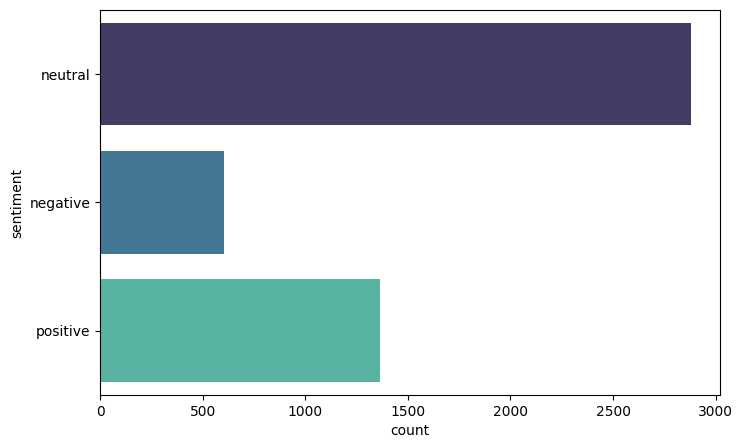

In [ ]:
plt.figure(figsize=(8, 5))
ax = sns.countplot(y="sentiment", data=df, palette="mako")

## **Applying Bag of Words, N-Grams** - **For comparision**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=100,binary=True)

In [ ]:
bob= cv.fit_transform(df['text']).toarray()

np.set_printoptions(edgeitems=30, linewidth=100000,
    formatter=dict(float=lambda u: "%.3g" % u))

In [ ]:
bob

array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ..., 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ..., 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ..., 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ..., 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ..., 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1

### **Creates a Large Sparse Matrix**
***

In [ ]:
bob.shape

(4845, 100)

In [ ]:
cv.vocabulary_

{'to': 87,
 'in': 44,
 'an': 12,
 'of': 60,
 'than': 83,
 '000': 0,
 'companies': 23,
 'and': 13,
 'the': 85,
 'said': 75,
 'company': 24,
 'has': 40,
 'from': 38,
 'its': 49,
 'with': 98,
 'new': 57,
 'production': 70,
 'plant': 69,
 'increase': 45,
 'according': 9,
 'for': 37,
 '2009': 6,
 'net': 56,
 'sales': 76,
 'operating': 63,
 'profit': 72,
 '10': 1,
 'is': 47,
 'by': 21,
 'on': 61,
 'quarter': 73,
 '2010': 7,
 'period': 68,
 'year': 99,
 'it': 48,
 'loss': 50,
 'increased': 46,
 'eur': 31,
 'mn': 54,
 'rose': 74,
 'corresponding': 29,
 '2007': 4,
 'up': 90,
 'business': 20,
 'customers': 30,
 'first': 36,
 'value': 91,
 'shares': 80,
 'agreement': 10,
 'at': 16,
 'finland': 34,
 'was': 92,
 'oyj': 66,
 'this': 86,
 'per': 67,
 'finnish': 35,
 '2005': 2,
 'compared': 25,
 '2006': 3,
 'helsinki': 43,
 'nokia': 58,
 'contract': 27,
 'services': 78,
 'corporation': 28,
 '2008': 5,
 'will': 97,
 'share': 79,
 'have': 41,
 'construction': 26,
 'technology': 82,
 'been': 19,
 'that':

### **N-Grams**

In [ ]:
## Create the Bag OF Words model wiith ngram
from sklearn.feature_extraction.text import CountVectorizer
## for Binary BOW enable binary=True
cv=CountVectorizer(max_features=100,binary=True, ngram_range= (1,1))  # max_features dentoes top 100 frequent vocabulary , binary denotes binary Bag of Words , ngram_range is unigram
bob= cv.fit_transform(df["text"]).toarray()

### **(1,1)- Unigram is completely same as above**
## **(2,2)- Bigram**

In [ ]:
## Create the Bag OF Words model wiith ngram
from sklearn.feature_extraction.text import CountVectorizer
## for Binary BOW enable binary=True
cv=CountVectorizer(max_features=100,binary=True, ngram_range= (2,2))  # max_features dentoes top 200 frequent vocabulary , binary denotes binary Bag of Words , ngram_range is unigram & Bigram
bob= cv.fit_transform(df["text"]).toarray()

In [ ]:
cv.vocabulary_

{'the company': 75,
 'of its': 50,
 'with the': 98,
 'the new': 82,
 'according to': 0,
 'to the': 91,
 'for the': 15,
 'net sales': 43,
 'in the': 26,
 'operating profit': 54,
 'quarter of': 61,
 'of 2010': 48,
 'the same': 83,
 'same period': 69,
 'year earlier': 99,
 'loss of': 34,
 'the third': 85,
 'third quarter': 88,
 'to eur': 90,
 'profit rose': 60,
 'rose to': 62,
 'mn from': 38,
 'from eur': 16,
 'eur mn': 11,
 'mn in': 39,
 'the corresponding': 77,
 'corresponding period': 7,
 'period in': 58,
 'in 2007': 22,
 'totalled eur': 92,
 'up from': 93,
 'of the': 51,
 'at the': 3,
 'in 2005': 20,
 'compared to': 6,
 'in 2006': 21,
 'sales of': 68,
 'per share': 57,
 'from the': 17,
 'in 2009': 24,
 'by the': 4,
 'number of': 44,
 'said that': 65,
 'last year': 33,
 'net profit': 42,
 'on the': 53,
 'company said': 5,
 'value of': 94,
 'oyj hel': 55,
 'in 2008': 23,
 'stock exchange': 71,
 'part of': 56,
 'its net': 32,
 'mln euro': 36,
 'that it': 72,
 'the world': 87,
 'is the': 

In [ ]:
def get_top_n_bigram(corpus, n=None):
    cv = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = cv.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(df["text"], 20)
for word, freq in common_words:
    print(word, freq)
df3 = pd.DataFrame(common_words, columns = ['text' , 'count'])
df3.groupby('text').sum()['count'].sort_values(ascending=False).plot(
    kind='bar',title='Top 20 bigrams in review before removing stop words')

in the 804
of the 719
the company 502
for the 356
will be 272
net sales 246
to the 242
to eur 227
from eur 210
eur mn 196
operating profit 194
mn in 190
and the 182
on the 175
the first 159
quarter of 155
in finland 153
to be 153
of eur 144
at the 125


In [ ]:
def get_top_n_bigram(corpus, n=None):
    cv = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bag_of_words = cv.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(df["text"], 20)
for word, freq in common_words:
    print(word, freq)
df4 = pd.DataFrame(common_words, columns = ['text' , 'count'])
df4.groupby('text').sum()['count'].sort_values(ascending=False).plot(
    kind='bar', title='Top 20 bigrams in review after removing stop words')

net sales 246
eur mn 196
operating profit 194
mn eur 127
corresponding period 108
mln euro 107
net profit 93
said today 86
oyj hel 85
company said 73
eur million 72
omx helsinki 63
profit eur 60
second quarter 57
euro mln 57
year earlier 56
mn corresponding 54
totalled eur 48
mln eur 48
net loss 47


## **(3,3) - Trigram**

In [ ]:
## Create the Bag OF Words model wiith ngram
from sklearn.feature_extraction.text import CountVectorizer
## for Binary BOW enable binary=True
cv=CountVectorizer(max_features=100,binary=True, ngram_range= (3,3))  # max_features dentoes top 200 frequent vocabulary , binary denotes binary Bag of Words , ngram_range is trigram
bob= cv.fit_transform(df["text"]).toarray()

In [ ]:
cv.vocabulary_

{'according to the': 0,
 'an operating profit': 1,
 'quarter of 2010': 65,
 'for the same': 22,
 'the same period': 89,
 'in the third': 28,
 'the third quarter': 91,
 'third quarter of': 93,
 'net sales increased': 45,
 'operating profit rose': 54,
 'profit rose to': 61,
 'rose to eur': 66,
 'mn from eur': 38,
 'from eur mn': 23,
 'eur mn in': 15,
 'mn in the': 39,
 'in the corresponding': 25,
 'the corresponding period': 82,
 'corresponding period in': 10,
 'mn up from': 40,
 'up from eur': 97,
 'board of directors': 6,
 'the number of': 88,
 'to eur mn': 94,
 'year on year': 99,
 'operating profit for': 52,
 'profit for the': 59,
 'as compared to': 3,
 'compared to the': 9,
 'period in 2005': 58,
 'the company said': 80,
 'value of the': 98,
 'stock exchange release': 74,
 'sales for the': 70,
 'its net sales': 33,
 'net sales for': 43,
 'as well as': 4,
 'its net profit': 32,
 'of the company': 50,
 'that it has': 75,
 'in finland and': 24,
 'same period of': 72,
 'in the first': 2

In [ ]:
def get_top_n_trigram(corpus, n=None):
    cv = CountVectorizer(ngram_range=(3, 3)).fit(corpus)
    bag_of_words = cv.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_trigram(df["text"], 20)
for word, freq in common_words:
    print(word, freq)
df5 = pd.DataFrame(common_words, columns = ['text' , 'count'])
df5.groupby('text').sum()['count'].sort_values(ascending=False).plot(
    kind='bar', title='Top 20 trigrams in review before removing stop words')

mn in the 120
the corresponding period 108
corresponding period in 87
as well as 82
in the first 76
mn from eur 73
eur mn in 73
in the corresponding 73
the end of 68
net sales of 66
the first quarter 58
the company said 57
the third quarter 53
from eur mn 52
value of the 52
the second quarter 51
mln euro mln 51
the same period 49
in the second 46
first quarter of 44


In [ ]:
def get_top_n_trigram(corpus, n=None):
    cv = CountVectorizer(ngram_range=(3, 3), stop_words='english').fit(corpus)
    bag_of_words = cv.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_trigram(df["text"], 20)
for word, freq in common_words:
    print(word, freq)
df6 = pd.DataFrame(common_words, columns = ['text' ,'count'])
df6.groupby('text').sum()['count'].sort_values(ascending=False).plot(
    kind='bar', title='Top 20 trigrams in review after removing stop words')

mn corresponding period 54
mln euro mln 51
eur mn eur 42
mn eur mn 41
net sales eur 30
profit eur mn 29
profit rose eur 27
earnings share eps 27
said today net 26
eur mn corresponding 25
eur mn compared 25
operating profit eur 24
corresponding period 2005 23
totalled eur mn 23
non recurring items 22
operating profit rose 21
corresponding period 2009 21
stock exchange release 21
net sales increased 20
month period increased 19


## **Comparision Text**
### **1. Count Vectorization**
Similar to BoW, but simply counts occurrences of words without applying weighting like TF-IDF.
### **2. Bag of Words (BoW)**
A simple and commonly used method where text is represented as a frequency vector of words. It ignores context and word order, which can limit accuracy.
### **3. N-grams**
Similar to BoW and TF-IDF but considers sequences of n words (bigrams, trigrams, etc.). This can capture some context but can lead to sparsity issues with larger n.
### **4. TF-IDF (Term Frequency-Inverse Document Frequency)**
A refinement of BoW that weighs the frequency of words by their importance in the document corpus. While better than BoW, it still lacks contextual understanding.



In [ ]:
df['text']

,text
0,"Technopolis plans to develop in stages an area of no less than 100,000 square meters in order to host companies working in computer technologies and telecommunications , the statement said ."
1,"The international electronic industry company Elcoteq has laid off tens of employees from its Tallinn facility ; contrary to earlier layoffs the company contracted the ranks of its office workers , the daily Postimees reported ."
2,With the new production plant the company would increase its capacity to meet the expected increase in demand and would improve the use of raw materials and therefore increase the production profitability .
3,"According to the company 's updated strategy for the years 2009-2012 , Basware targets a long-term net sales growth in the range of 20 % -40 % with an operating profit margin of 10 % -20 % of net sales ."
4,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is aggressively pursuing its growth strategy by increasingly focusing on technologically more demanding HDI printed circuit boards PCBs .
...,...
4840,LONDON MarketWatch -- Share prices ended lower in London Monday as a rebound in bank stocks failed to offset broader weakness for the FTSE 100 .
4841,"Rinkuskiai 's beer sales fell by 6.5 per cent to 4.16 million litres , while Kauno Alus ' beer sales jumped by 6.9 per cent to 2.48 million litres ."
4842,"Operating profit fell to EUR 35.4 mn from EUR 68.8 mn in 2007 , including vessel sales gain of EUR 12.3 mn ."
4843,"Net sales of the Paper segment decreased to EUR 221.6 mn in the second quarter of 2009 from EUR 241.1 mn in the second quarter of 2008 , while operating profit excluding non-recurring items rose to EUR 8.0 mn from EUR 7.6 mn ."


In [ ]:
X = df['text']

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode target labels
le = LabelEncoder()
Y = le.fit_transform(df['sentiment'])


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
# Create a CountVectorizer to convert text data into numerical features
vectorizer = CountVectorizer()

# Fit the vectorizer to the training data and transform it
X_train = vectorizer.fit_transform(X_train)

# Transform the test data using the same vectorizer
X_test = vectorizer.transform(X_test)



---



## **LOGISTIC REGRESSION**

In [ ]:
model = LogisticRegression(max_iter=1000,  C=1.0, penalty='l2', solver='liblinear')
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
y_pred = model.predict(X_test)

#Accuracy Score
print('Logistic Regression')
lr_accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {lr_accuracy}")
print(classification_report(y_test, y_pred))

Logistic Regression
Accuracy: 0.7739938080495357
              precision    recall  f1-score   support

           0       0.79      0.53      0.64       115
           1       0.77      0.90      0.83       567
           2       0.78      0.61      0.68       287

    accuracy                           0.77       969
   macro avg       0.78      0.68      0.72       969
weighted avg       0.78      0.77      0.77       969



In [ ]:
#Scores on training and test set
print('Training set score: {:.4f}'.format(model.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(model.score(X_test, y_test)))

Training set score: 0.9788
Test set score: 0.7740




---



## **RANDOM FOREST CLASSIFIER**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest Classifier with the specified parameters
rf_model = RandomForestClassifier(class_weight='balanced', n_estimators=1000, max_depth=20, min_samples_split=10, min_samples_leaf=2, max_features='sqrt', random_state=42)

# Fit the model on the training data
rf_model.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', max_depth=20,
                       min_samples_leaf=2, min_samples_split=10,
                       n_estimators=1000, random_state=42)

In [ ]:
# Make predictions on the test data
y_pred = rf_model.predict(X_test)

In [ ]:
#Accuracy Score
print('Random Forest Classifier')
rf_accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {rf_accuracy}")
print(classification_report(y_test, y_pred))

Random Forest Classifier
Accuracy: 0.7254901960784313
              precision    recall  f1-score   support

           0       0.53      0.58      0.56       115
           1       0.75      0.89      0.81       567
           2       0.79      0.46      0.58       287

    accuracy                           0.73       969
   macro avg       0.69      0.64      0.65       969
weighted avg       0.73      0.73      0.71       969



In [ ]:
#Scores on training and test set
print('Training set score: {:.4f}'.format(rf_model.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(rf_model.score(X_test, y_test)))

Training set score: 0.8057
Test set score: 0.7255




---



## **XGBOOST CLASSIFIER**

In [ ]:
from xgboost import XGBClassifier
model = XGBClassifier(n_estimators=500, min_child_weight=3, learning_rate=0.05, max_depth=5, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8, colsample_bytree=0.8)
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
#Accuracy Score
print('XGB Classifer')
xgb_accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {xgb_accuracy}")
print(classification_report(y_test, y_pred))

XGB Classifer
Accuracy: 0.762641898864809
              precision    recall  f1-score   support

           0       0.75      0.53      0.62       115
           1       0.76      0.92      0.83       567
           2       0.79      0.55      0.65       287

    accuracy                           0.76       969
   macro avg       0.77      0.67      0.70       969
weighted avg       0.77      0.76      0.75       969



In [ ]:
#Scores on training and test set
print('Training set score: {:.4f}'.format(model.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(model.score(X_test, y_test)))

Training set score: 0.8780
Test set score: 0.7626




---



In [ ]:
# Assuming lr_accuracy_score, rf_accuracy_score, xgb_accuracy_score are defined
print("Logistic Regression Accuracy:", lr_accuracy)
print("Random Forest Classifier Accuracy:", rf_accuracy)
print("XGB Classifier Accuracy:", xgb_accuracy)

# Create a dictionary to store model names and accuracy scores
data = {'Model': ['Logistic Regression', 'Random Forest Classifier', 'XGB Classifier'],
        'Accuracy': [lr_accuracy, rf_accuracy, xgb_accuracy]}

# Create a pandas DataFrame
df_accuracy = pd.DataFrame(data)

# Sort the DataFrame by Accuracy in descending order
df_accuracy_sorted = df_accuracy.sort_values(by='Accuracy', ascending=False)

# Print the sorted DataFrame
df_accuracy_sorted

Logistic Regression Accuracy: 0.7739938080495357
Random Forest Classifier Accuracy: 0.7254901960784313
XGB Classifier Accuracy: 0.762641898864809


,Model,Accuracy
0,Logistic Regression,0.773994
2,XGB Classifier,0.762642
1,Random Forest Classifier,0.725490
